In [1]:
import random
import numpy as np
import pandas as pd
import utils.Measures as measures
import utils.DataManipulation as dm

from sklearn import model_selection, preprocessing, metrics, tree

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

In [2]:
df = pd.read_csv("./data/carseats.csv")

In [3]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
qualitative_columns = ["ShelveLoc", "Urban", "US"]
df_encoded = pd.get_dummies(df, columns=qualitative_columns, dtype=int)

In [5]:
df_encoded

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [6]:
df_encoded.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [7]:
n, p = df_encoded.shape
print(f"Num of examples: {n}")
print(f"Num of features: {p}")

Num of examples: 400
Num of features: 15


In [8]:
df_encoded.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.240000,0.212500,0.547500,0.295000,0.705000,0.355000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.427618,0.409589,0.498362,0.456614,0.456614,0.479113,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
np.sum(df_encoded.isnull(), axis=0)

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
dtype: int64

In [10]:
sales_col = np.array(df_encoded["Sales"].tolist())
df_encoded["Sales"] = np.where(sales_col > 8, 1, 0).tolist()

In [11]:
target = "High"
df_encoded.rename({"Sales": target}, inplace=True, axis="columns")

In [12]:
df_encoded.head(10)

,High,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,0,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
5,1,124,113,13,501,72,78,16,1,0,0,1,0,0,1
6,0,115,105,0,45,108,71,15,0,0,1,0,1,1,0
7,1,136,81,15,425,120,67,10,0,1,0,0,1,0,1
8,0,132,110,0,108,124,76,10,0,0,1,1,0,1,0
9,0,132,113,0,131,124,76,17,0,0,1,1,0,0,1


In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   High              400 non-null    int64
 1   CompPrice         400 non-null    int64
 2   Income            400 non-null    int64
 3   Advertising       400 non-null    int64
 4   Population        400 non-null    int64
 5   Price             400 non-null    int64
 6   Age               400 non-null    int64
 7   Education         400 non-null    int64
 8   ShelveLoc_Bad     400 non-null    int64
 9   ShelveLoc_Good    400 non-null    int64
 10  ShelveLoc_Medium  400 non-null    int64
 11  Urban_No          400 non-null    int64
 12  Urban_Yes         400 non-null    int64
 13  US_No             400 non-null    int64
 14  US_Yes            400 non-null    int64
dtypes: int64(15)
memory usage: 47.0 KB


In [14]:
TEST_SIZE, SEED = 0.3, 42

X, y = df_encoded.drop(columns=["High"]), df_encoded["High"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED, stratify=y)

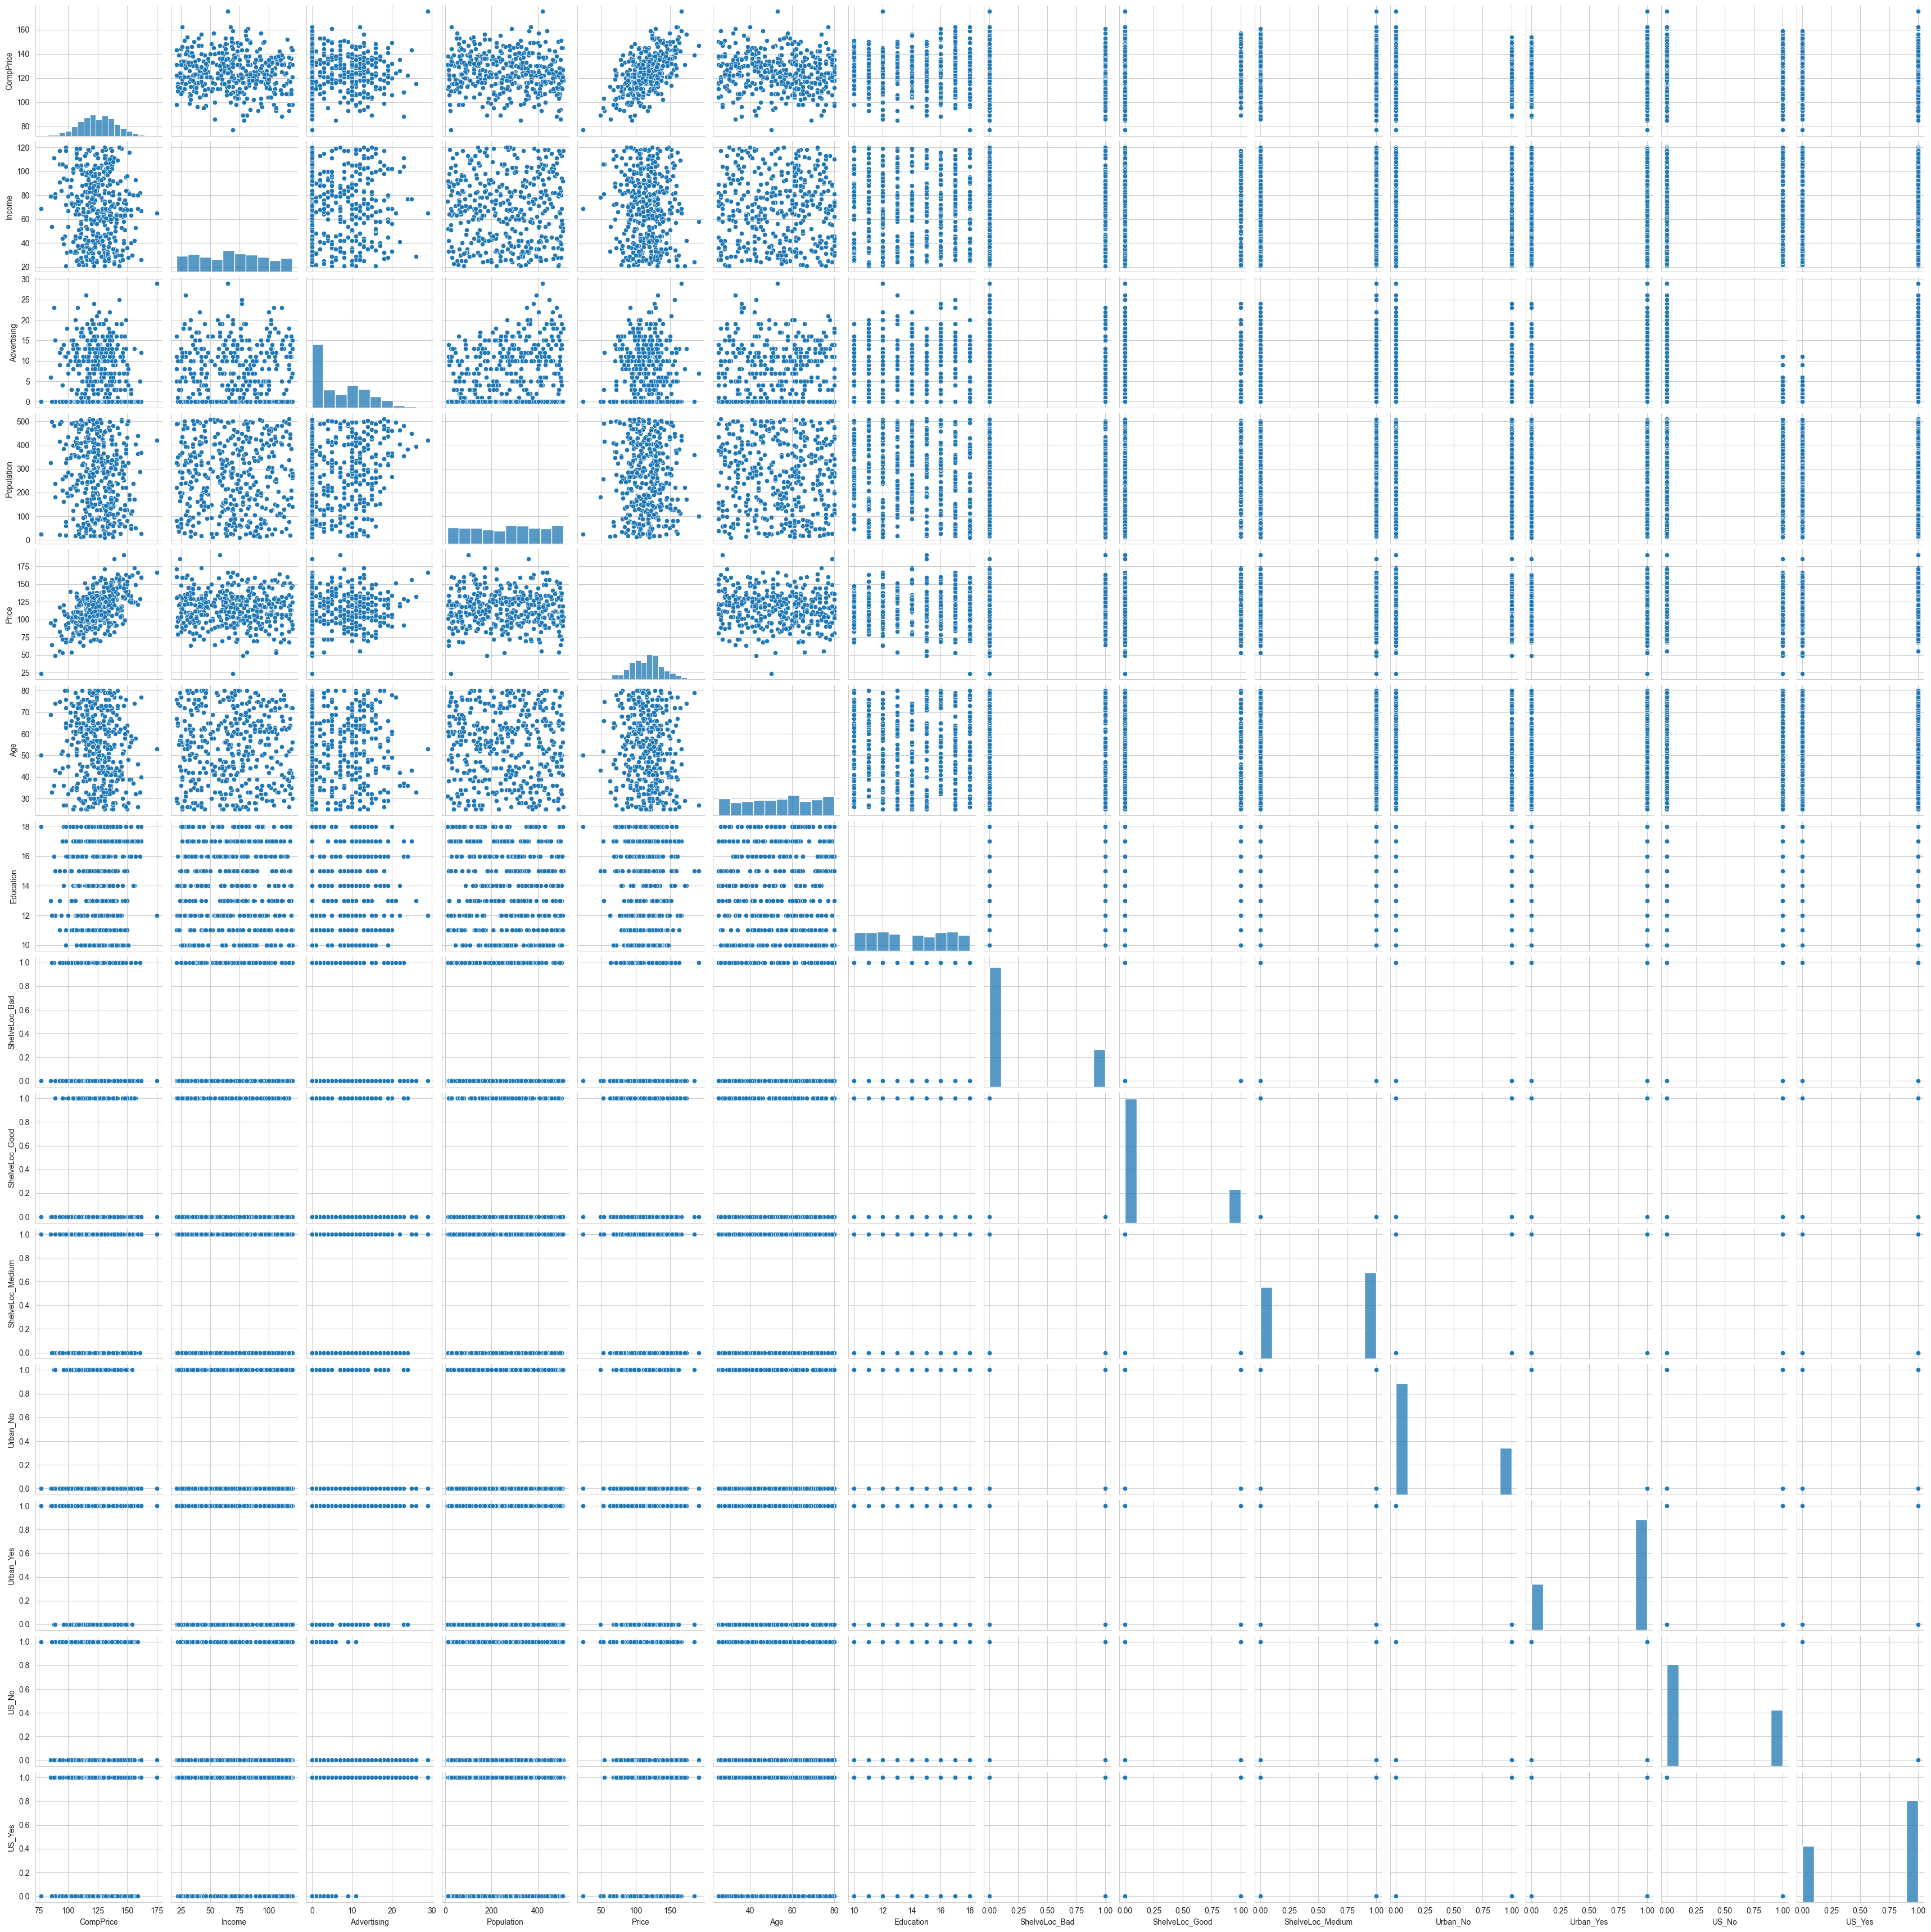

In [15]:
indp_vars = X.columns.tolist()
ax = sns.pairplot(data=df_encoded, vars=indp_vars)
plt.rcParams["figure.figsize"] = (5,4)
plt.show()

In [71]:
class TreeNode:
    
    def __init__(self, eval_fn, class_label=None):
        self.left = None
        self.right = None
        self.eval_fn = eval_fn
        self.class_label = class_label
        
        
    def decide(self, training_example):
        
        if self.class_label != None:
            return self.class_label
        
        elif self.eval_fn(training_example) or not self.right:
            return self.left.decide(training_example)
        
        return self.right.decide(training_example)

In [25]:
class DecisionTree:
    
    def __init__(self, data, response, d):
        self.response = response
        self.root = self.train(data.loc[:, data.columns != response], data.loc[:, data.columns == response], d)
        
    def gini_impurity(self, class_vector):
        np_data = np.array(class_vector)
        classifications, counts = np.unique(np_data, return_counts=True)
    
        total_count = np_data.shape[0]
        gini_impurity_prob = 1 - np.sum((counts / total_count) ** 2)
    
        return gini_impurity_prob
    
    
    def calc_entropy(self, y):
        
        entropy = 0
        for p_hat_m_k in y.value_counts(normalize=True):
            entropy -= p_hat_m_k * np.log(p_hat_m_k) 
        return entropy
        
        
    # Maximize the return value (i.e., information gain)
    def calc_information_gain(self, prev_data, prev_entropy, split_data):
        
        new_entropy = 0
        for partition in split_data:
            
            partition_entropy = self.calc_entropy(partition.loc[:, self.response])
            partition_weight = len(partition) / len(prev_data)
            
            new_entropy += (partition_entropy * partition_weight)
        
        return prev_entropy - new_entropy
            
            
    def train(self, X, y, d):
        
        curr_entropy = self.calc_entropy(y)
        
        if d == 0 or curr_entropy == 0:
            return TreeNode(None, np.bincount(y.values.flatten()).argmax())
        
        max_information_gain, best_feature_to_split, best_feature_mean, left_data, right_data = float("-inf"), None, None, [], []
        features = X.columns.tolist()
        data = pd.concat([X, y], axis=1)
        for feature in features:
            
            feature_mean = np.mean(data.loc[:, feature])
            
            left_split = data.loc[data[feature] <= feature_mean, :]
            right_split = data.loc[data[feature] > feature_mean, :]
            
            curr_information_gain = self.calc_information_gain(X, curr_entropy, [left_split, right_split]) 
            
            if curr_information_gain > max_information_gain:
                max_information_gain = curr_information_gain
                best_feature_to_split = feature
                best_feature_mean = feature_mean
                left_data = left_split
                right_data = right_split
        
        eval_fn = lambda training_example: training_example[best_feature_to_split] <= best_feature_mean
        parent_node = TreeNode(eval_fn, None)
        
        parent_node.left = self.train(left_data.loc[:, left_data.columns != self.response], left_data.loc[:, left_data.columns == self.response], d-1)
        parent_node.right = self.train(right_data.loc[:, right_data.columns != self.response], right_data.loc[:, right_data.columns == self.response], d-1)
        
        return parent_node
    
    
    def classify(self, test_data):
        return test_data.apply(self.root.decide, axis=1).tolist()

In [33]:
best_acc, best_d = 0, None
k_folds = dm.kfold(X_train, y_train, 5)
best_DT = None

for d in range(1, 10):
    
    for train_data, val_data in k_folds:
        df_train_data, df_val_data = pd.DataFrame(train_data), pd.DataFrame(val_data)
        DT = DecisionTree(df_train_data, target, d)
        
        X_val, y_val = df_val_data.loc[:, df_val_data.columns != target], df_val_data.loc[:, target]
        
        y_hat = DT.classify(X_val)
        confusion_matrix = measures.calc_confusion_matrix(y_val.tolist(), y_hat)
        curr_acc = measures.calc_accuracy(confusion_matrix["TP"], confusion_matrix["FP"], confusion_matrix["TN"], confusion_matrix["FN"])
        
        if curr_acc > best_acc:
            best_acc = curr_acc
            best_d = d
            best_DT = DT

print(f"Best Validation Accuracy (d={best_d}): {best_acc*100:.2f}%")

y_hat = best_DT.classify(X_test)
confusion_matrix = measures.calc_confusion_matrix(y_test.tolist(), y_hat)
test__acc = measures.calc_accuracy(confusion_matrix["TP"], confusion_matrix["FP"], confusion_matrix["TN"], confusion_matrix["FN"])

print(f"Test Accuracy: {test__acc*100:.2f}%")

Best Validation Accuracy (d=6): 83.93%
Test Accuracy: 68.33%


In [24]:
clf = tree.DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
clf_predictions = clf.predict(X_test)

clf_confusion_matrix = measures.calc_confusion_matrix(y_test.tolist(), clf_predictions)
clf_acc = measures.calc_accuracy(clf_confusion_matrix["TP"], clf_confusion_matrix["FP"], clf_confusion_matrix["TN"], clf_confusion_matrix["FN"])

print(f"Sklearn Decision Tree Classifier Accuracy: {clf_acc*100:.2f}%")

Sklearn Decision Tree Classifier Accuracy: 80.83%


## Ensemble Learning & Bagging

In [67]:
sample_size = 0.4
best_d, best_size, lowest_error, best_ensemble = None, None, float('inf'), []
sizes = [5, 10, 25, 50, 100, 150]
k = 5
k_folds = dm.kfold(X_train, y_train, k)

for d in range(1, 7):
    for size in sizes:
        
        fold_training_error = 0
        
        for train_data, val_data in k_folds:
            
            df_train_data, df_val_data = pd.DataFrame(train_data), pd.DataFrame(val_data)
            X_val, y_val = df_val_data.loc[:, df_val_data.columns != target], df_val_data.loc[:, target]
            
            bagging_trees = []
            for _ in range(size):
                data_train_subset = df_train_data.sample(frac=sample_size, replace=True)
                DT = DecisionTree(data_train_subset, target, d)
                bagging_trees.append(DT)

            decisions = {}
            
            for idx, tree in enumerate(bagging_trees):
                decisions[f'tree_{idx+1}'] = tree.classify(X_val)
            votes = pd.DataFrame(decisions)
            
            maj_votes = votes.mode(axis=1)[0]
            
            ensemble_confusion_matrix = measures.calc_confusion_matrix(y_val.tolist(), maj_votes.tolist())
            ensemble_acc = measures.calc_accuracy(ensemble_confusion_matrix["TP"], ensemble_confusion_matrix["FP"], ensemble_confusion_matrix["TN"], ensemble_confusion_matrix["FN"])
            
            fold_training_error += (1 - ensemble_acc)
        
        fold_training_error /= k
        if fold_training_error < lowest_error:
            lowest_error = fold_training_error
            best_d = d
            best_size = size

print(f"Ensemble Bagging Decision Tree Validation Accuracy: {(1 - lowest_error)*100:.2f}%")
print(f"Best ensemble size: {best_size}")
print(f"Best depth: {best_d}")

best_ensemble = []

for _ in range(best_size):
    full_train_data = pd.concat([X_train, y_train], axis=1)
    data_train_subset = full_train_data.sample(frac=sample_size, replace=True)
    DT = DecisionTree(data_train_subset, target, best_d)
    best_ensemble.append(DT)

decisions = {}    
for idx, tree in enumerate(best_ensemble):
    decisions[f'tree_{idx+1}'] = tree.classify(X_test)
    
votes = pd.DataFrame(decisions)
maj_votes = votes.mode(axis=1)[0]

bagging_confusion_matrix = measures.calc_confusion_matrix(y_test.tolist(), maj_votes.tolist())
test__acc = measures.calc_accuracy(bagging_confusion_matrix["TP"], bagging_confusion_matrix["FP"], bagging_confusion_matrix["TN"], bagging_confusion_matrix["FN"])

print(f"Test Accuracy: {test__acc*100:.2f}%")

Ensemble Bagging Decision Tree Validation Accuracy: 80.71%
Best ensemble size: 100
Best depth: 6
Test Accuracy: 80.83%


### Random Forest

In [68]:
class RandomForest:
    
    def __init__(self, data, response, d, feature_size):
        self.response = response
        self.feature_subsample_size = feature_size
        
        self.root = self.train(data.loc[:, data.columns != response], data.loc[:, data.columns == response], d)

        
    def gini_impurity(self, class_vector):
        np_data = np.array(class_vector)
        classifications, counts = np.unique(np_data, return_counts=True)
    
        total_count = np_data.shape[0]
        gini_impurity_prob = 1 - np.sum((counts / total_count) ** 2)
    
        return gini_impurity_prob
    
    
    def calc_entropy(self, y):
        
        entropy = 0
        for p_hat_m_k in y.value_counts(normalize=True):
            entropy -= p_hat_m_k * np.log(p_hat_m_k) 
        return entropy
        
        
    # Maximize the return value (i.e., information gain)
    def calc_information_gain(self, prev_data, prev_entropy, split_data):
        
        new_entropy = 0
        for partition in split_data:
            
            partition_entropy = self.calc_entropy(partition.loc[:, self.response])
            partition_weight = len(partition) / len(prev_data)
            
            new_entropy += (partition_entropy * partition_weight)
        
        return prev_entropy - new_entropy
            
            
    def train(self, X, y, d):
        
        curr_entropy = self.calc_entropy(y)
        
        if d == 0 or curr_entropy == 0:
            return TreeNode(None, np.bincount(y.values.flatten()).argmax())
        
        max_information_gain, best_feature_to_split, best_feature_mean, left_data, right_data = float("-inf"), None, None, [], []
        
        random_subset_features = X.sample(frac=self.feature_subsample_size, axis=1).columns.tolist()
        data = pd.concat([X, y], axis=1)
        
        for feature in random_subset_features:
            
            feature_mean = np.mean(data.loc[:, feature])
            
            left_split = data.loc[data[feature] <= feature_mean, :]
            right_split = data.loc[data[feature] > feature_mean, :]
            
            curr_information_gain = self.calc_information_gain(X, curr_entropy, [left_split, right_split]) 
            
            if curr_information_gain > max_information_gain:
                max_information_gain = curr_information_gain
                best_feature_to_split = feature
                best_feature_mean = feature_mean
                left_data = left_split
                right_data = right_split
        
        eval_fn = lambda training_example: training_example[best_feature_to_split] <= best_feature_mean
        parent_node = TreeNode(eval_fn, None)
        
        if len(left_data) > 0: 
            parent_node.left = self.train(left_data.loc[:, left_data.columns != self.response], left_data.loc[:, left_data.columns == self.response], d-1)
        if len(right_data) > 0:
            parent_node.right = self.train(right_data.loc[:, right_data.columns != self.response], right_data.loc[:, right_data.columns == self.response], d-1)
        
        return parent_node
    
    
    def classify(self, test_data):
        return test_data.apply(self.root.decide, axis=1).tolist()

In [73]:
sample_size, feature_size = 0.6, 0.4
best_d, best_size, lowest_error = None, None, float('inf')
sizes = [50, 100, 150, 200]
k = 5
depths = [1, 2, 3, 4, 5, 6]
k_folds = dm.kfold(X_train, y_train, k)

for d in depths:
    for size in sizes:
        
        fold_training_error = 0
        
        for train_data, val_data in k_folds:
            
            df_train_data, df_val_data = pd.DataFrame(train_data), pd.DataFrame(val_data)
            X_val, y_val = df_val_data.loc[:, df_val_data.columns != target], df_val_data.loc[:, target]
            
            bagging_trees = []
            for _ in range(size):
                data_train_subset = df_train_data.sample(frac=sample_size, replace=True)
                
                DT = RandomForest(data_train_subset, target, d, feature_size)
                bagging_trees.append(DT)

            decisions = {}
            
            for idx, tree in enumerate(bagging_trees):
                decisions[f'tree_{idx+1}'] = tree.classify(X_val)
            votes = pd.DataFrame(decisions)
            
            maj_votes = votes.mode(axis=1)[0]
            
            ensemble_confusion_matrix = measures.calc_confusion_matrix(y_val.tolist(), maj_votes.tolist())
            ensemble_acc = measures.calc_accuracy(ensemble_confusion_matrix["TP"], ensemble_confusion_matrix["FP"], ensemble_confusion_matrix["TN"], ensemble_confusion_matrix["FN"])
            
            fold_training_error += (1 - ensemble_acc)
        
        fold_training_error /= k
        if fold_training_error < lowest_error:
            lowest_error = fold_training_error
            best_d = d
            best_size = size

print(f"Ensemble Bagging Decision Tree Validation Accuracy: {(1 - lowest_error)*100:.2f}%")
print(f"Best ensemble size: {best_size}")
print(f"Best depth: {best_d}")

best_ensemble = []

for _ in range(best_size):
    full_train_data = pd.concat([X_train, y_train], axis=1)
    data_train_subset = full_train_data.sample(frac=sample_size, replace=True)
    DT = RandomForest(data_train_subset, target, best_d, feature_size)
    best_ensemble.append(DT)

decisions = {}    
for idx, tree in enumerate(best_ensemble):
    decisions[f'tree_{idx+1}'] = tree.classify(X_test)
    
votes = pd.DataFrame(decisions)
maj_votes = votes.mode(axis=1)[0]

rf_confusion_matrix = measures.calc_confusion_matrix(y_test.tolist(), maj_votes.tolist())
test__acc = measures.calc_accuracy(rf_confusion_matrix["TP"], rf_confusion_matrix["FP"], rf_confusion_matrix["TN"], rf_confusion_matrix["FN"])

print(f"Test Accuracy: {test__acc*100:.2f}%")

Ensemble Bagging Decision Tree Validation Accuracy: 80.36%
Best ensemble size: 150
Best depth: 5
Test Accuracy: 80.83%
